In [1]:
REPO_NAMES = [
    "comp-think/2018-2019",
    "comp-think/2019-2020",
    "comp-think/2020-2021",
    "comp-think/2022-2023", 
    "comp-think/2023-2024",
    "comp-think/2024-2025",
    ] 

Cohort Statistics:
  Repository  Unique Users
0  2018-2019            32
3  2019-2020            22
2  2020-2021            36
4  2022-2023            30
1  2023-2024            41
5  2024-2025            37


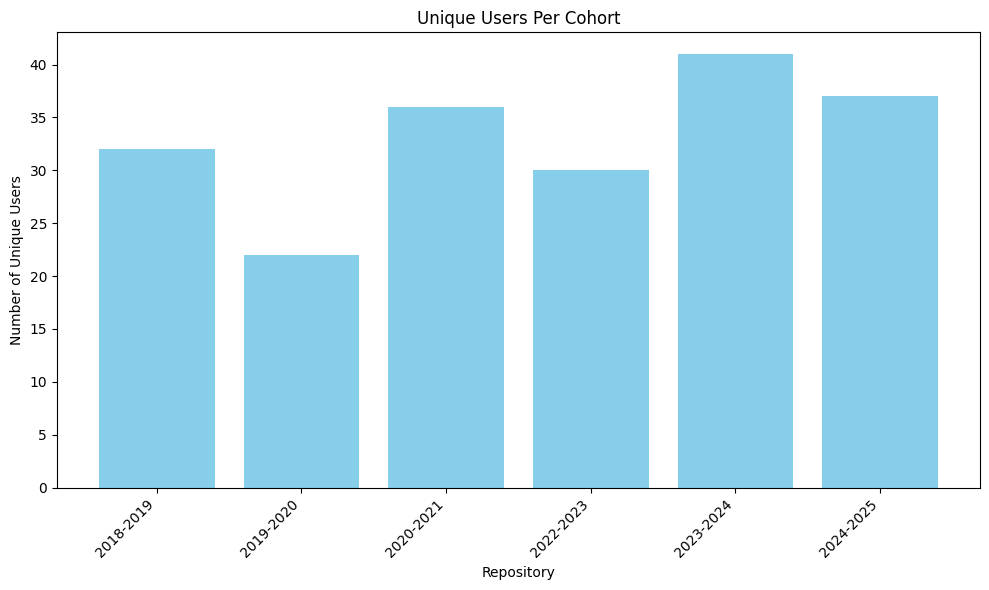

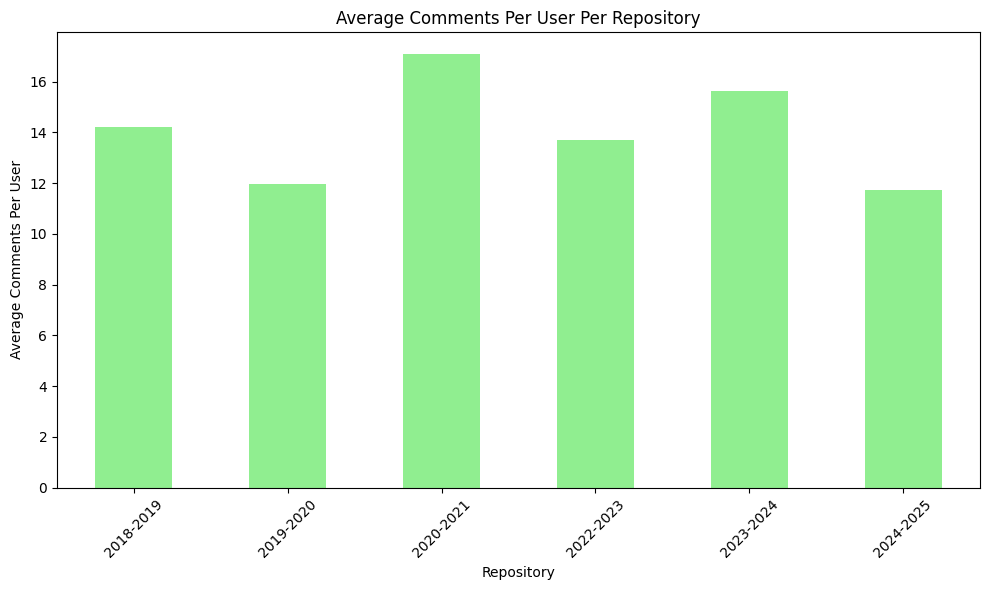

<Figure size 1200x600 with 0 Axes>

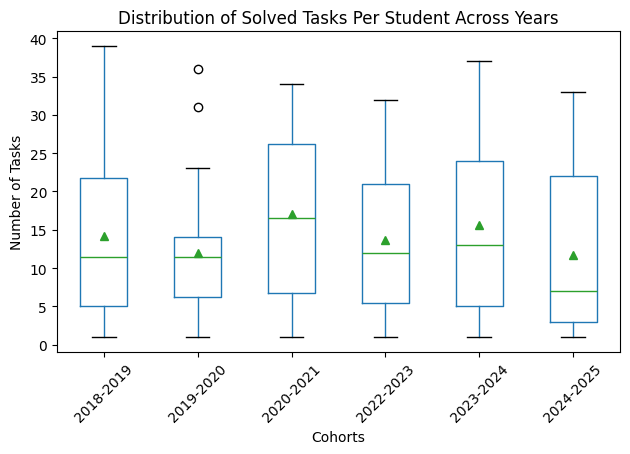

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_and_analyze_data(csv_folder):
    """Load CSV files and create basic analysis DataFrames."""
    csv_files = Path(csv_folder).glob("*.csv")
    
    # Data containers
    user_involvement_df = pd.DataFrame()
    cohort_stats = {}
    
    for file in csv_files:
        # Read data
        data = pd.read_csv(file)
        repo_name = data['repo_name'].iloc[0]
        
        # Get unique users count
        cohort_stats[repo_name] = data['comment_user'].nunique()
        
        # Get user involvement
        user_comments = data['comment_user'].value_counts().reset_index()
        user_comments.columns = ['User', 'Comments']
        user_comments['Repository'] = repo_name
        user_involvement_df = pd.concat([user_involvement_df, user_comments], ignore_index=True)
    
    # Create cohort statistics DataFrame
    cohort_df = pd.DataFrame(list(cohort_stats.items()), 
                           columns=["Repository", "Unique Users"]).sort_values(by="Repository")
    
    # Clean repository names
    cohort_df["Repository"] = cohort_df["Repository"].str.replace("comp-think/", "")
    user_involvement_df["Repository"] = user_involvement_df["Repository"].str.replace("comp-think/", "")
    
    return cohort_df, user_involvement_df

def plot_cohort_analysis(cohort_df, user_involvement_df, figures_dir="figures"):
    """Create visualization plots for cohort analysis."""
    # Create figures directory if it doesn't exist
    Path(figures_dir).mkdir(exist_ok=True)
    # Figure 1: Unique Users per Cohort
    plt.figure(figsize=(10, 6))
    plt.bar(cohort_df["Repository"], cohort_df["Unique Users"], color="skyblue")
    plt.title("Unique Users Per Cohort")
    plt.xlabel("Repository")
    plt.ylabel("Number of Unique Users")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f"{figures_dir}/unique_users_per_cohort.png")
    plt.show()

    # Figure 2: Average Comments Per User
    avg_comments = user_involvement_df.groupby('Repository')['Comments'].mean()
    plt.figure(figsize=(10, 6))
    avg_comments.sort_index().plot(kind='bar', color='lightgreen')
    plt.title("Average Comments Per User Per Repository")
    plt.xlabel("Repository")
    plt.ylabel("Average Comments Per User")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{figures_dir}/avg_comments_per_user.png")
    plt.show()

    # Figure 3: Distribution Box Plot
    plt.figure(figsize=(12, 6))
    user_involvement_df.boxplot(by='Repository', column='Comments', 
                              grid=False, showmeans=True)
    plt.title("Distribution of Solved Tasks Per Student Across Years")
    plt.suptitle("")  # Remove default suptitle
    plt.xlabel("Cohorts")
    plt.ylabel("Number of Tasks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{figures_dir}/task_distribution_boxplot.png")
    plt.show()


cohort_df, user_involvement_df = load_and_analyze_data("repo_data")
print("Cohort Statistics:")
print(cohort_df)
    
plot_cohort_analysis(cohort_df, user_involvement_df)
